<h1 style="text-align: center; color: #69A3FF">The Influence of Social Media on Stock Market</h1>

### Introduction
Social media has a significant and dynamic impact on stock market movements in the quickly changing world of modern finance. The emergence of social media platforms such as Facebook, Instagram, Twitter, and others has led to an unparalleled spread of information that affects trading decisions and investor sentiment. This work explores the complex relationship between social media and stock markets, focusing on how the sharing of news, opinions, and real-time interactions on these platforms can have a big impact on market dynamics.

### Social media’s evolution in the finance industry:

The emergence of social media platforms signalled a paradigm shift in communication, therefore it made sense for them to spread throughout the industry. After beginning as personal message boards, social media sites like Facebook, LinkedIn, and Twitter changed to include financial conversations, news, and investment-related content. Due to this evolution, financial information is now more accessible to a wider audience, allowing them to participate in conversations that were previously exclusive to established financial channels.

<h2 style="text-align: center; color: #69A3FF">Import packages</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Importing mdates for date formatting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

### Loading a CSV File 
The following code snippets demonstrates how to load a CSV file into a pandas DataFrame and display the dataset

In [2]:
social_media_dataset = pd.read_csv('full_dataset-release.csv', engine='python')

In [3]:
social_media_dataset

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.00000,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.00000,0.0
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1.00000,0.0
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356843,NaN,PayPal,30/09/2018,87.84,0.000000,0.000000,0.013092,0.031648,7.920916e+06,15.754,23.131,-1.000,0.20000,NaN
1356844,862229,RT @RifatJawaid: Deceased Apple executive's br...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1356845,NaN,Apple,30/09/2018,225.74,0.000000,0.000000,-0.003500,-0.035793,2.292936e+07,15.841,20.065,1.000,0.00000,NaN
1356846,862230,Flat 6000 INR cashback on HDFC debit and credi...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Review
As we can see, there are missing and redundant data. In the given dataset, there are columns that we won't need moving forward and will need to remove. This will be handled in the following steps of the code.

The code snippet is performing data cleaning and preparation on the dataset. It first selects only the relevant columns, 'TWEET', 'STOCK', and 'DATE', from the dataset. Then, it removes any rows containing missing values using the dropna() function. Finally, it displays the first few rows of the cleaned dataset using the head() function. This process is essential for ensuring data quality and consistency before further analysis or modeling.

In [4]:
# Select only the desired columns
social_media_dataset = social_media_dataset[['TWEET', 'STOCK', 'DATE']]

In [5]:
social_media_dataset = social_media_dataset.dropna()

In [6]:
social_media_dataset.head()

,TWEET,STOCK,DATE
1,Amazon,31/01/2017,823.48
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017
6,Amazon,31/01/2017,823.48


The code snippet is converting the DATE column in the social_media_dataset to a datetime format, handling potential conversion errors by coercing invalid values to NaN. It then drops any rows where the conversion failed, ensuring data consistency and accuracy for further analysis. Finally, it prints the dataset information using social_media_dataset.info(), providing a summary of the column names, data types, and non-null values.

In [7]:
# Convert the DATE column to datetime
social_media_dataset['DATE'] = pd.to_datetime(social_media_dataset['DATE'], errors='coerce')


# Drop any rows where the DATE conversion failed
social_media_dataset = social_media_dataset.dropna(subset=['DATE'])


C:\Users\ZHAN\AppData\Local\Temp\ipykernel_26216\1468525184.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  social_media_dataset['DATE'] = pd.to_datetime(social_media_dataset['DATE'], errors='coerce')


In [8]:
social_media_dataset

,TWEET,STOCK,DATE
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31
11,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,2017-01-31
20,@gawker Jamaicans make money with @Payoneer @P...,PayPal,2017-01-31
...,...,...,...
1356819,RT @rmbyrne: Do you have any colleagues who th...,Google,2018-09-30
1356820,RT @AnnCoulter: Item No. 3 for FBI to investig...,Ford,2018-09-30
1356829,RT @radiodisney: Tune in to the Radio Disney I...,Disney,2018-09-30
1356834,"Rockets Fall at Fresno State, 49-27; Return Ho...",Next,2018-09-30


In [9]:
social_media_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385475 entries, 2 to 1356841
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   TWEET   385475 non-null  object        
 1   STOCK   385475 non-null  object        
 2   DATE    385475 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 11.8+ MB


Filter for valid stock names (e.g., letters and digits, typically uppercase)

In [10]:

valid_stock_pattern = r'^[A-Za-z0-9]+$'
social_media_dataset = social_media_dataset[social_media_dataset['STOCK'].str.match(valid_stock_pattern)]

In [11]:
social_media_dataset

,TWEET,STOCK,DATE
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31
11,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,2017-01-31
20,@gawker Jamaicans make money with @Payoneer @P...,PayPal,2017-01-31
...,...,...,...
1356819,RT @rmbyrne: Do you have any colleagues who th...,Google,2018-09-30
1356820,RT @AnnCoulter: Item No. 3 for FBI to investig...,Ford,2018-09-30
1356829,RT @radiodisney: Tune in to the Radio Disney I...,Disney,2018-09-30
1356834,"Rockets Fall at Fresno State, 49-27; Return Ho...",Next,2018-09-30


Remove duplicate tweets, keeping the first occurrence and reset the index after dropping duplicates

In [12]:
social_media_dataset = social_media_dataset.drop_duplicates(subset='TWEET', keep='first')

social_media_dataset = social_media_dataset.reset_index(drop=True)

In [13]:
social_media_dataset

,TWEET,STOCK,DATE
0,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31
1,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31
2,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31
3,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,2017-01-31
4,@gawker Jamaicans make money with @Payoneer @P...,PayPal,2017-01-31
...,...,...,...
205276,RT @time2trade2: @McAllisterDen Trump called f...,Ford,2018-09-30
205277,Thanks Google\r\r\r\r\r\r\n\r\r\r\r\r\r\nHey L...,Google,2018-09-30
205278,@KapilSharmaK9 \r\r\r\r\r\r\nWas watching your...,Sony,2018-09-30
205279,RT @rmbyrne: Do you have any colleagues who th...,Google,2018-09-30


Replace 'Facebook' with 'Meta' in the 'STOCK' column

In [14]:
social_media_dataset['STOCK'] = social_media_dataset['STOCK'].replace('Facebook', 'Meta')

<h2 style="text-align: center; color: #69A3FF">Sentimental Analysis</h2>
We shall use vanderSentiment to determine the sentiment of each post. It has been for social media sentiment analysis and so makes it the best option in our case.

Feel free to check out the github page at https://github.com/cjhutto/vaderSentiment

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

### Making the Sentiment function
we shall now make a function that takes in text and returns the sentiment of that textent

In [16]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVanderSentiment(score):    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negative"
    
    return score

### Applying the Function
We now use the function we have made to add sentiment to every tweet.t

In [17]:
social_media_dataset['vander_score'] = social_media_dataset['TWEET'].apply(lambda tweet: getVanderScore(tweet))
social_media_dataset['vander_sentiment'] = social_media_dataset['vander_score'].apply(lambda score: getVanderSentiment(score))
social_media_dataset[['TWEET', 'STOCK', 'DATE', 'vander_score', 'vander_sentiment']]

,TWEET,STOCK,DATE,vander_score,vander_sentiment
0,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,0.0000,Neutral
1,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31,0.0000,Neutral
2,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31,0.0000,Neutral
3,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,2017-01-31,0.6908,Positive
4,@gawker Jamaicans make money with @Payoneer @P...,PayPal,2017-01-31,0.0000,Neutral
...,...,...,...,...,...
205276,RT @time2trade2: @McAllisterDen Trump called f...,Ford,2018-09-30,0.0000,Neutral
205277,Thanks Google\r\r\r\r\r\r\n\r\r\r\r\r\r\nHey L...,Google,2018-09-30,0.4404,Positive
205278,@KapilSharmaK9 \r\r\r\r\r\r\nWas watching your...,Sony,2018-09-30,0.4939,Positive
205279,RT @rmbyrne: Do you have any colleagues who th...,Google,2018-09-30,0.0000,Neutral


### Pie chart
The pie chart represents the top 15 most mentioned stocks on social media since 2017 to almost 2019, with the remaining stocks grouped together as "Other." The chart is visually appealing, with clear labels for each stock and corresponding percentages. The colors used effectively differentiate the various categories, making it easy to interpret the data. The chart provides a concise overview of the most frequently discussed stocks, offering valuable insights into market trends and investor interest.

C:\Users\ZHAN\AppData\Local\Temp\ipykernel_26216\1250964543.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


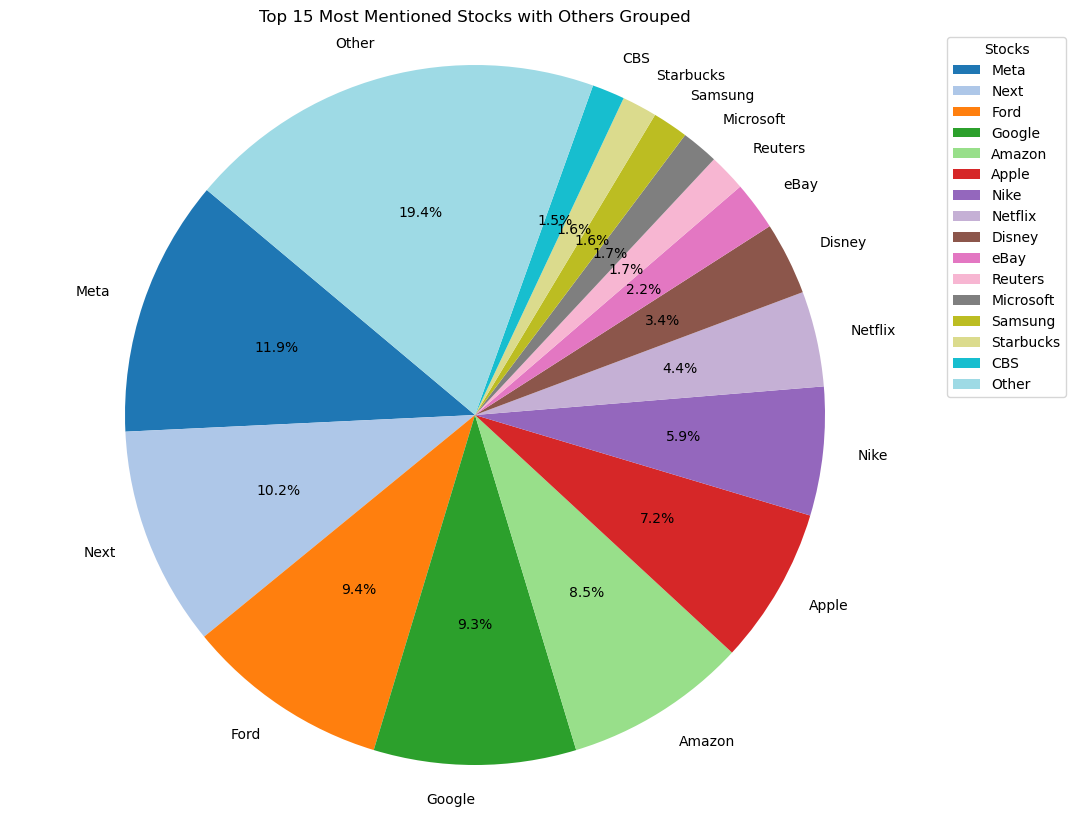

In [18]:
stock_counts = social_media_dataset['STOCK'].value_counts()

# Select top 15 stocks
top_stocks = stock_counts.head(15)

# Group the rest into 'Other'
other_count = stock_counts[15:]
other_series = pd.Series([other_count.sum()], index=['Other'])

# Combine the top 15 with 'Other'
top_stocks = pd.concat([top_stocks, other_series])

# Define a colormap with enough distinct colors
num_colors = len(top_stocks)
colors = plt.cm.get_cmap('tab20', num_colors)

# Plotting the pie chart
plt.figure(figsize=(12, 10))
plt.pie(top_stocks, labels=top_stocks.index, autopct='%1.1f%%', startangle=140, colors=colors(np.arange(num_colors)))
plt.title('Top 15 Most Mentioned Stocks with Others Grouped')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(top_stocks.index, title='Stocks', loc='best', bbox_to_anchor=(1, 1))

# Show plot
plt.show()

### Date
The code snippet is calculating the minimum and maximum values of the DATE column in the social_media_dataset. The output indicates that the earliest date is '2017-01-02' and the last date is '2018-09-30'. This information is useful for understanding the temporal range of the data and for subsequent analysis or visualization.

In [19]:
# Find the earliest date
earliest_date = social_media_dataset['DATE'].min()
last_date = social_media_dataset['DATE'].max()

In [20]:
earliest_date

Timestamp('2017-01-02 00:00:00')

In [21]:
last_date

Timestamp('2018-12-09 00:00:00')

<h2 style="text-align: center; color: #69A3FF">Loading datasets for Meta, Microsoft and Apple stock prices</h2>

### Meta Dataset
It contains stock price data for Meta. The DataFrame contains 3028 rows, representing daily stock price data from 2012-05-18 to 2024-05-31.

In [22]:
meta_stocks_dataset = pd.read_csv('Meta Dataset.csv')

In [23]:
meta_stocks_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.189480,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.993931,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.967144,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.966084,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.994991,50237200
...,...,...,...,...,...,...,...
3023,2024-05-24,467.619995,479.850006,466.299988,478.220001,478.220001,12012300
3024,2024-05-28,476.579987,480.859985,474.839996,479.920013,479.920013,10175800
3025,2024-05-29,474.660004,479.850006,473.700012,474.359985,474.359985,9226200
3026,2024-05-30,471.670013,471.730011,464.709991,467.049988,467.049988,10735200


### Microsoft Dataset
It contains stock price data for Microsoft. The DataFrame contains 9631 rows, representing daily stock price data from 1986-03-13 to 2024-05-31

In [24]:
msft_stocks_dataset = pd.read_csv('Microsoft Dataset.csv')

In [25]:
msft_stocks_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9627,2024-05-24,427.190002,431.059998,424.410004,430.160004,430.160004,11845800
9628,2024-05-28,429.630005,430.820007,426.600006,430.320007,430.320007,15718000
9629,2024-05-29,425.690002,430.940002,425.690002,429.170013,429.170013,15517100
9630,2024-05-30,424.299988,424.299988,414.239990,414.670013,414.670013,28394500


### Apple Dataset
It contains stock price data for Apple. The DataFrame contains 10467 rows, representing daily stock price data from 1980-12-12 to 2022-06-17

In [26]:
apple_stocks_dataset = pd.read_csv('AAPL.csv')

In [27]:
apple_stocks_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


### Filter the DataFrames
The code snippet is cleaning and filtering datasets to prepare it for further analysis. It first removes any rows containing missing values using dropna(). Then, it converts the Date column to a datetime format, handling potential conversion errors by coercing invalid values to NaN. Next, it defines the start and end dates as timestamps. Finally, it filters the DataFrame to include only the rows within the specified date range and resets the index. These steps ensure data quality and consistency, and focus the analysis on the relevant time period.

In [28]:
meta_stocks_dataset = meta_stocks_dataset.dropna()

In [29]:
# Convert 'Date' column to datetime format
meta_stocks_dataset['Date'] = pd.to_datetime(meta_stocks_dataset['Date'], errors='coerce')

# Define the start and end dates
start_date = pd.Timestamp('2017-01-02')
end_date = pd.Timestamp('2018-12-09')

# Filter the DataFrame
meta_stocks_dataset = meta_stocks_dataset[(meta_stocks_dataset['Date'] >= start_date) & (meta_stocks_dataset['Date'] <= end_date)]

# Reset the index
meta_stocks_dataset.reset_index(drop=True, inplace=True)

In [30]:
meta_stocks_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.736145,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.564201,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.542099,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.279205,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.767624,22880400
...,...,...,...,...,...,...,...
482,2018-11-30,138.259995,140.970001,137.360001,140.610001,140.460968,25732600
483,2018-12-03,143.000000,143.679993,140.759995,141.089996,140.940460,24819200
484,2018-12-04,140.729996,143.389999,137.160004,137.929993,137.783798,30307400
485,2018-12-06,133.820007,139.699997,133.669998,139.630005,139.482010,28218100


In [31]:
# Convert 'Date' column to datetime format
msft_stocks_dataset['Date'] = pd.to_datetime(msft_stocks_dataset['Date'], errors='coerce')

# Define the start and end dates
start_date = pd.Timestamp('2017-01-02')
end_date = pd.Timestamp('2018-12-09')

# Filter the DataFrame
msft_stocks_dataset = msft_stocks_dataset[(msft_stocks_dataset['Date'] >= start_date) & (msft_stocks_dataset['Date'] <= end_date)]

# Reset the index
msft_stocks_dataset.reset_index(drop=True, inplace=True)

In [32]:
msft_stocks_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,62.790001,62.840000,62.130001,62.580002,56.930576,20694100
1,2017-01-04,62.480000,62.750000,62.119999,62.299999,56.675835,21340000
2,2017-01-05,62.189999,62.660000,62.029999,62.299999,56.675835,24876000
3,2017-01-06,62.299999,63.150002,62.040001,62.840000,57.167099,19922900
4,2017-01-09,62.759998,63.080002,62.540001,62.639999,56.985161,20382700
...,...,...,...,...,...,...,...
482,2018-11-30,110.699997,110.970001,109.360001,110.889999,104.917229,33665600
483,2018-12-03,113.000000,113.419998,110.730003,112.089996,106.052589,34732800
484,2018-12-04,111.940002,112.639999,108.209999,108.519997,102.674873,45197000
485,2018-12-06,105.820000,109.239998,105.000000,109.190002,103.308777,49107400


In [33]:
# Convert 'Date' column to datetime format
apple_stocks_dataset['Date'] = pd.to_datetime(apple_stocks_dataset['Date'], errors='coerce')

# Define the start and end dates
start_date = pd.Timestamp('2017-01-02')
end_date = pd.Timestamp('2018-12-09')

# Filter the DataFrame
apple_stocks_dataset = apple_stocks_dataset[(apple_stocks_dataset['Date'] >= start_date) & (apple_stocks_dataset['Date'] <= end_date)]

# Reset the index
apple_stocks_dataset.reset_index(drop=True, inplace=True)

In [34]:
apple_stocks_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.257652,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.227137,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.365595,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.670673,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.924124,134247600
...,...,...,...,...,...,...,...
482,2018-11-30,45.072498,45.082500,44.257500,44.645000,43.221703,158126000
483,2018-12-03,46.115002,46.235001,45.302502,46.205002,44.731968,163210000
484,2018-12-04,45.237499,45.597500,44.067501,44.172501,42.764271,165377200
485,2018-12-06,42.939999,43.695000,42.605000,43.680000,42.287472,172393600


The code snippet is printing the minimum and maximum values of the Date column for three datasets: apple_stocks_dataset, msft_stocks_dataset, and meta_stocks_dataset. This will output the earliest and latest dates available in each dataset, providing information about the temporal range of the stock price data.

In [35]:
print(apple_stocks_dataset['Date'].min(), apple_stocks_dataset['Date'].max())
print(msft_stocks_dataset['Date'].min(), msft_stocks_dataset['Date'].max())
print(meta_stocks_dataset['Date'].min(), meta_stocks_dataset['Date'].max())

2017-01-03 00:00:00 2018-12-07 00:00:00
2017-01-03 00:00:00 2018-12-07 00:00:00
2017-01-03 00:00:00 2018-12-07 00:00:00


Create copies of the datasets to avoid SettingWithCopyWarning

In [36]:
apple_stocks_dataset = apple_stocks_dataset.copy()
msft_stocks_dataset = msft_stocks_dataset.copy()
meta_stocks_dataset = meta_stocks_dataset.copy()

# Ensure 'Date' column is in datetime format and set it as the index
apple_stocks_dataset['Date'] = pd.to_datetime(apple_stocks_dataset['Date'], errors='coerce')
apple_stocks_dataset.set_index('Date', inplace=True)

msft_stocks_dataset['Date'] = pd.to_datetime(msft_stocks_dataset['Date'], errors='coerce')
msft_stocks_dataset.set_index('Date', inplace=True)

meta_stocks_dataset['Date'] = pd.to_datetime(meta_stocks_dataset['Date'], errors='coerce')
meta_stocks_dataset.set_index('Date', inplace=True)

### Plotting the closing prices of Apple, Microsoft and Meta
The line charts represent the closing prices of stocks over time. The x-axis represents the date, while the y-axis represents the closing price. The charts display a clear upward trend in the stocks prices from 2017 to 2018, with a slight dip towards the end of 2018. The overall trend suggests a positive performance during the given period.

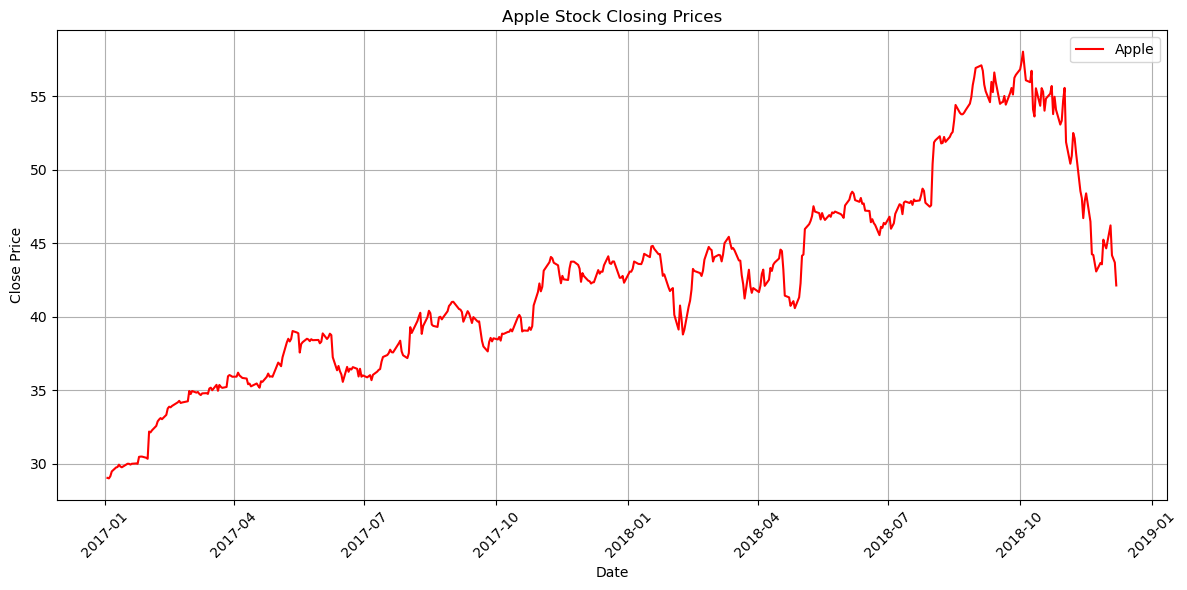

In [37]:

plt.figure(figsize=(12, 6))
plt.plot(apple_stocks_dataset.index, apple_stocks_dataset['Close'], color='r', label = 'Apple')
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

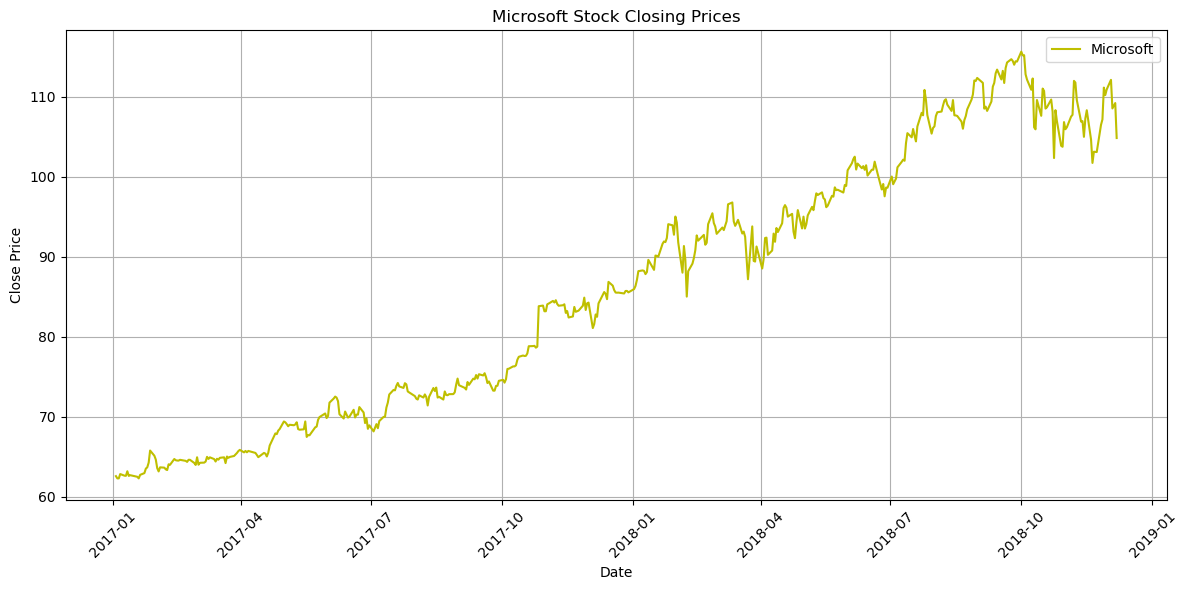

In [38]:
# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(msft_stocks_dataset.index, msft_stocks_dataset['Close'], color='y', label = 'Microsoft')
plt.title('Microsoft Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

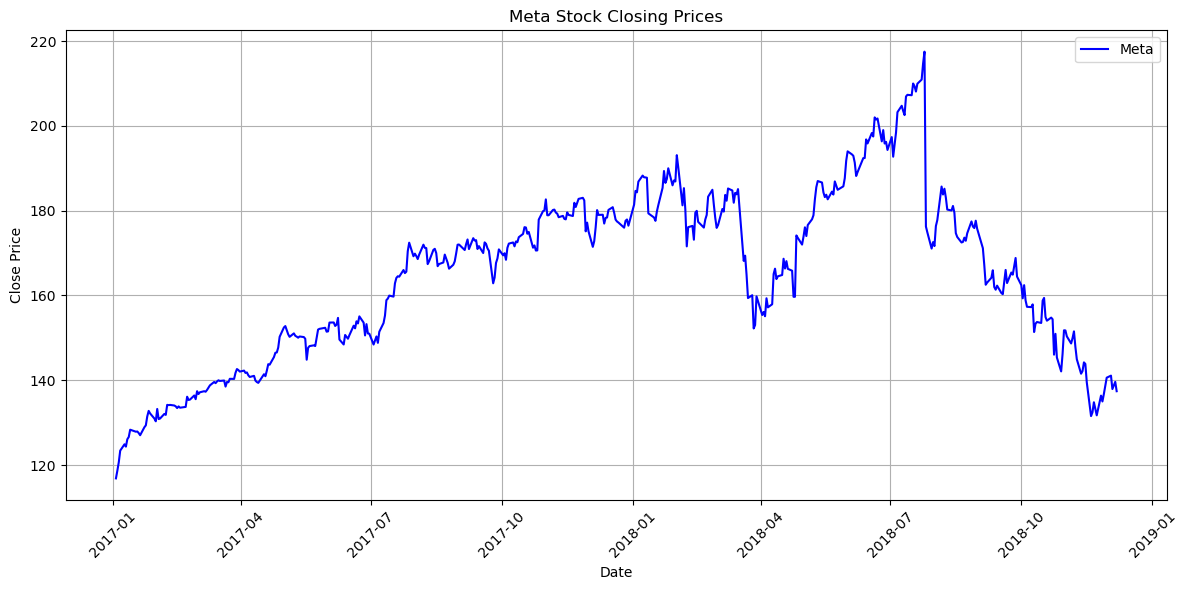

In [39]:
# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(meta_stocks_dataset.index, meta_stocks_dataset['Close'], color='b', label = 'Meta')
plt.title('Meta Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Stock Closing Prices Comparison
The line chart compare the closing prices of Apple, Microsoft, and Meta stocks over time. The x-axis represents the date, while the y-axis represents the closing price. The chart displays the stock price trends for each company from 2017 to 2018. Microsoft's stock price consistently outperforms Apple and Meta throughout the entire period. Apple's stock price experiences a significant increase in 2017 but then declines towards the end of 2018. Meta's stock price remains relatively stable with a slight upward trend in 2017 but then declines sharply in 2018.

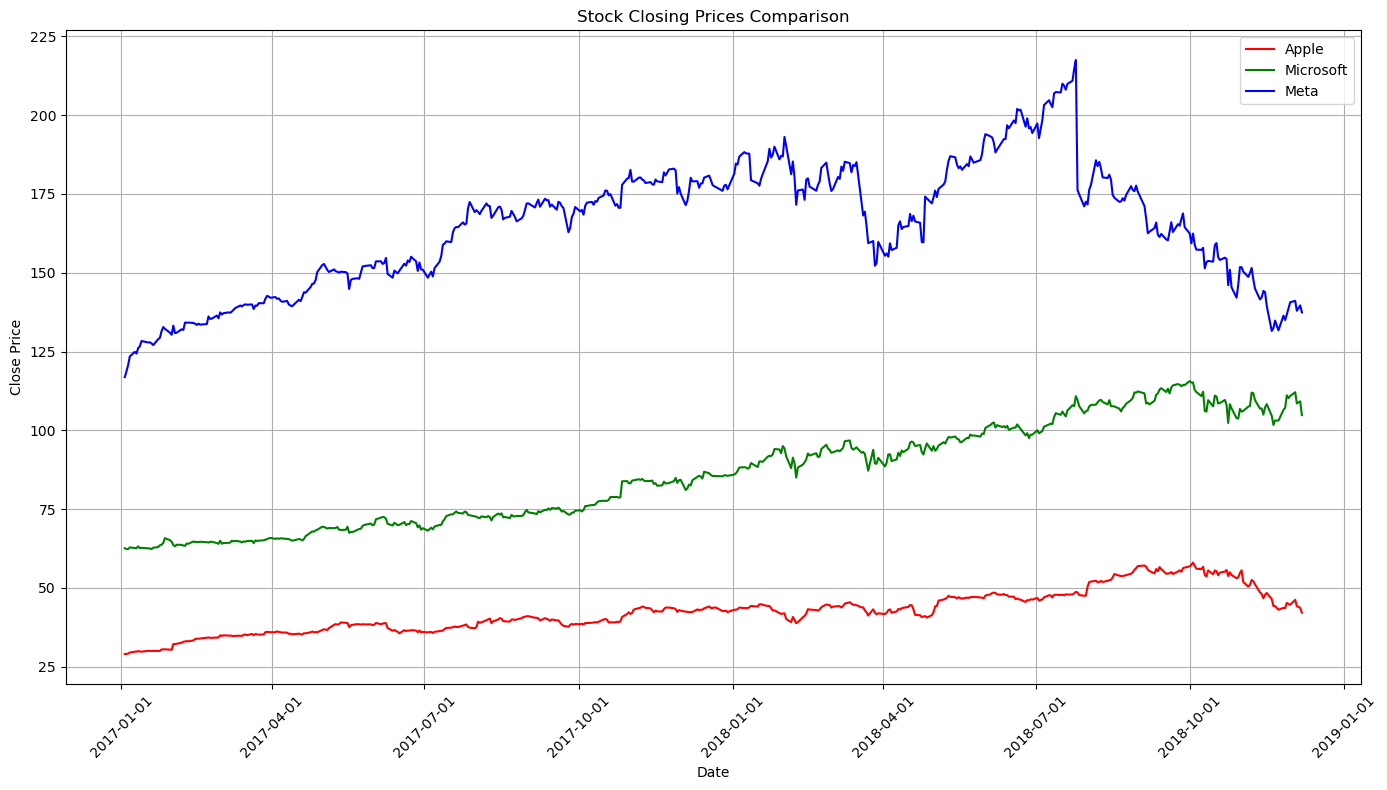

In [40]:
plt.figure(figsize=(14, 8))

plt.plot(apple_stocks_dataset.index, apple_stocks_dataset['Close'], color='r', label='Apple')
plt.plot(msft_stocks_dataset.index, msft_stocks_dataset['Close'], color='g', label='Microsoft')
plt.plot(meta_stocks_dataset.index, meta_stocks_dataset['Close'], color='b', label='Meta')

plt.title('Stock Closing Prices Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

# Set date format on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

<h2 style="text-align: center; color: #69A3FF">Analysis</h2>

### The code snippet is performing sentiment analysis on Microsoft tweets and comparing the results to Microsoft's stock price on a specific date. Here's a breakdown of the steps involved:


1. Data Preparation:
- Resets the index of the msft_stocks_dataset to ensure consistency.
- Converts the Date column in both datasets to datetime format for accurate date-based operations.

3. Data Filtering:
- Filters the social_media_dataset for tweets mentioning "Microsoft" on the specified date (date_to_analyze).
- Filters the msft_stocks_dataset for Microsoft's stock data on the same date.

4. Sentiment Analysis:
- If there are tweets about Microsoft on the specified date, calculates the average sentiment using the vader_score column.
- If no tweets are found, prints a message indicating that no Microsoft tweets were found on that date.

5. Stock Price Comparison:
- If there is stock data for Microsoft on the specified date, extracts the opening and closing prices.
Calculates the price change as the difference between the closing and opening prices.
- If no stock data is found, prints a message indicating that no stock data was found for Microsoft on that date.

6. Conclusions:
- If both tweets and stock data are available, analyzes the relationship between the average sentiment and the price change.
- If the average sentiment is positive and the price change is positive, concludes that positive sentiment might have influenced the stock price positively.
- If the average sentiment is negative and the price change is negative, concludes that negative sentiment might have influenced the stock price negatively.
- If no clear relationship is observed, concludes that no clear relationship exists between sentiment and stock price on that date.

Overall, the code aims to understand whether there is a correlation between public sentiment expressed in social media and the performance of Microsoft's stock price on a specific day.

In [41]:
msft_stocks_dataset= msft_stocks_dataset.reset_index()

In [51]:
# Convert the 'Date' column in the Microsoft stock dataset to datetime format
msft_stocks_dataset['Date'] = pd.to_datetime(msft_stocks_dataset['Date'], errors='coerce')

# Convert the 'DATE' column in the social media dataset to datetime format
social_media_dataset['DATE'] = pd.to_datetime(social_media_dataset['DATE'], errors='coerce')

# Sample date to analyze :2017-08-31 ,2017-11-31
date_to_analyze = '2017-08-31'

# Step 1: Filter the social media dataset for Microsoft tweets on the specific date
microsoft_tweet_on_date = social_media_dataset[(social_media_dataset['STOCK'] == 'Microsoft') & 
                                               (social_media_dataset['DATE'] == date_to_analyze)]

# Step 2: Filter the stock dataset for Microsoft's stock data on the specific date
microsoft_stock_on_date = msft_stocks_dataset[msft_stocks_dataset['Date'] == date_to_analyze]

# Step 3: Analyze the sentiment on the specific date
if not microsoft_tweet_on_date.empty:
    average_sentiment = microsoft_tweet_on_date['vander_score'].mean()
    print(f"Average Sentiment on {date_to_analyze}: {average_sentiment}")
else:
    print(f"No Microsoft tweets found on {date_to_analyze}")

# Step 4: Compare stock price on the specific date
if not microsoft_stock_on_date.empty:
    open_price = microsoft_stock_on_date['Open'].values[0]
    close_price = microsoft_stock_on_date['Close'].values[0]
    price_change = close_price - open_price
    print(f"Microsoft stock price on {date_to_analyze}: Open = {open_price}, Close = {close_price}, Change = {price_change}")
else:
    print(f"No stock data found for Microsoft on {date_to_analyze}")

# Step 5: Draw conclusions
if not microsoft_tweet_on_date.empty and not microsoft_stock_on_date.empty:
    if average_sentiment > 0 and price_change > 0:
        print("Positive sentiment possibly influenced the stock price positively on this date.")
    elif average_sentiment < 0 and price_change < 0:
        print("Negative sentiment possibly influenced the stock price negatively on this date.")
    else:
        print("No clear relationship observed between sentiment and stock price on this date.")

Average Sentiment on 2017-08-31: 0.18969
Microsoft stock price on 2017-08-31: Open = 74.029999, Close = 74.769997, Change = 0.7399979999999999
Positive sentiment possibly influenced the stock price positively on this date.


### Meta Stock Prices and Sentiment Analysis for January 2017
The chart shows a positive correlation between the average sentiment of Meta-related tweets and its stock price in January 2017. As the average sentiment increases, the stock price also tends to rise, suggesting that positive sentiment in social media might have played a role in driving up the stock price during that period. However, the correlation is not perfect, and there are instances where the stock price moves in the opposite direction of the sentiment.

In [43]:
meta_stocks_dataset = meta_stocks_dataset.reset_index()

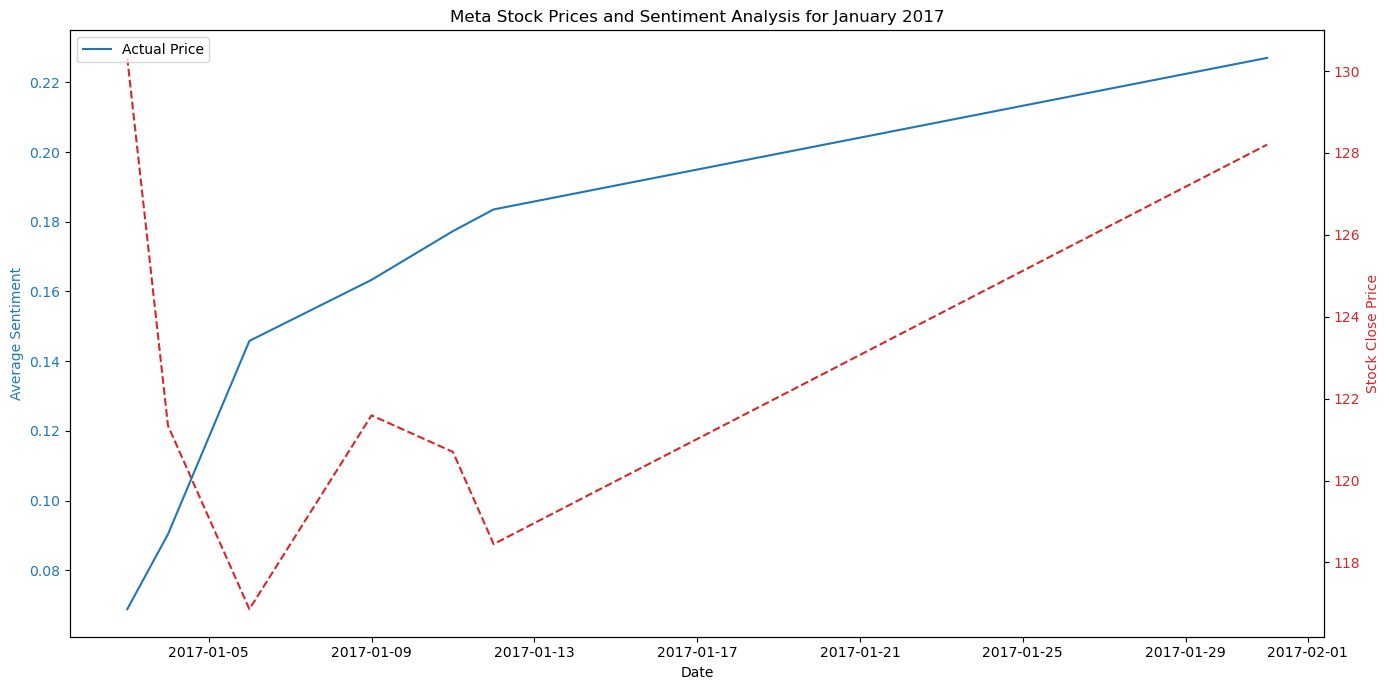

In [44]:
# Step 1: Filter Data for One Month
# Example month: January 2017
start_date = '2017-01-01'
end_date = '2017-01-31'

# Filter social media dataset for Microsoft tweets in January 2017
meta_tweets_jan = social_media_dataset[(social_media_dataset['STOCK'] == 'Meta') &
                                       (social_media_dataset['DATE'] >= start_date) &
                                       (social_media_dataset['DATE'] <= end_date)]

# Filter Microsoft stock prices for January 2017
meta_stock_jan = meta_stocks_dataset[(meta_stocks_dataset['Date'] >= start_date) &
                                     (meta_stocks_dataset['Date'] <= end_date)]

# Step 2: Calculate Daily Sentiment
# Group by date and calculate the average sentiment score for each day
daily_sentiment = meta_tweets_jan.groupby('DATE')['vander_score'].mean().reset_index()

# Step 3: Merge sentiment data with stock data
# Merge based on date to ensure alignment between sentiment and stock prices
merged_data = pd.merge(daily_sentiment, meta_stock_jan, left_on='DATE', right_on='Date')

# Step 4: Plot the Data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the average sentiment scores
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sentiment', color='tab:blue')
ax1.plot(merged_data['DATE'], merged_data['vander_score'], color='tab:red', linestyle='--', label='Average Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the stock closing prices
ax2 = ax1.twinx()
ax2.set_ylabel('Stock Close Price', color='tab:red')
ax2.plot(merged_data['DATE'], merged_data['Close'], color='tab:blue', label='Actual Price')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title
plt.title('Meta Stock Prices and Sentiment Analysis for January 2017')

# Show the plot
fig.tight_layout()
plt.legend()
plt.show()

### Meta Stock Prices: Close, High, and Low (January 2017)
The chart shows the daily closing, high, and low prices of Meta stock for January 2017. The x-axis represents the date, while the y-axis represents the stock price. The chart displays three lines: one for the closing price (blue), one for the high price (green), and one for the low price (red). The chart shows that Meta's stock price fluctuated throughout January 2017, with the highest price recorded on January 25th and the lowest price recorded on January 5th. Overall, the stock price showed a slight upward trend during the month.

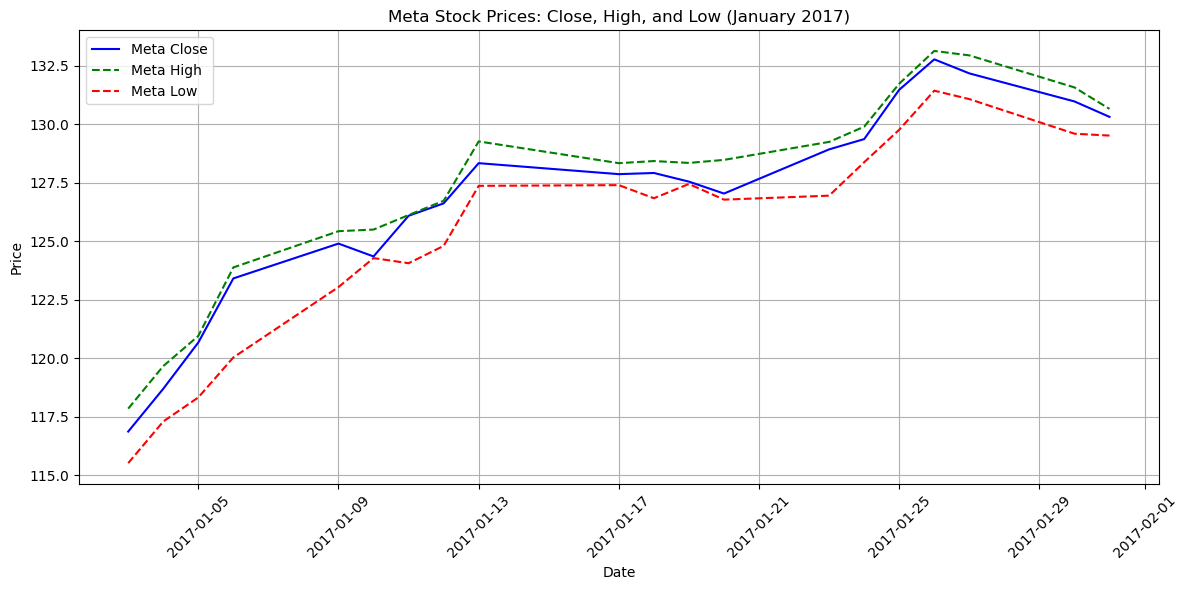

In [45]:
# Define the date range for January 2017
start_date = '2017-01-01'
end_date = '2017-01-31'

# Ensure the 'Date' column is in datetime format
meta_stocks_dataset['Date'] = pd.to_datetime(meta_stocks_dataset['Date'])

# Filter the dataset for the specified date range
filtered_meta_stocks = meta_stocks_dataset[(meta_stocks_dataset['Date'] >= start_date) &
                                           (meta_stocks_dataset['Date'] <= end_date)]

# Plotting the closing prices, high, and low prices
plt.figure(figsize=(12, 6))

# Plotting the closing prices
plt.plot(filtered_meta_stocks['Date'], filtered_meta_stocks['Close'], color='b', label='Meta Close')

# Plotting the high prices with green dashed lines
plt.plot(filtered_meta_stocks['Date'], filtered_meta_stocks['High'], color='g', linestyle='--', label='Meta High')

# Plotting the low prices with red dashed lines
plt.plot(filtered_meta_stocks['Date'], filtered_meta_stocks['Low'], color='r', linestyle='--', label='Meta Low')

# Customizing the plot
plt.title('Meta Stock Prices: Close, High, and Low (January 2017)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

<h2 style="text-align: center; color: #69A3FF">Predictions</h2>

### Meta Stock Price Prediction Based on Social Media Sentiment
The chart shows a comparison between the actual Meta stock prices and predicted stock prices based on social media sentiment. The x-axis represents the date, while the y-axis represents the stock price. The blue line represents the actual stock prices, and the red line represents the predicted stock prices. The chart shows that the predicted stock prices follow the general trend of the actual stock prices but are not always accurate. In some periods, the predicted prices are significantly higher or lower than the actual prices.

Mean Absolute Error: 4.995501423661917
Root Mean Squared Error: 6.050597495488314


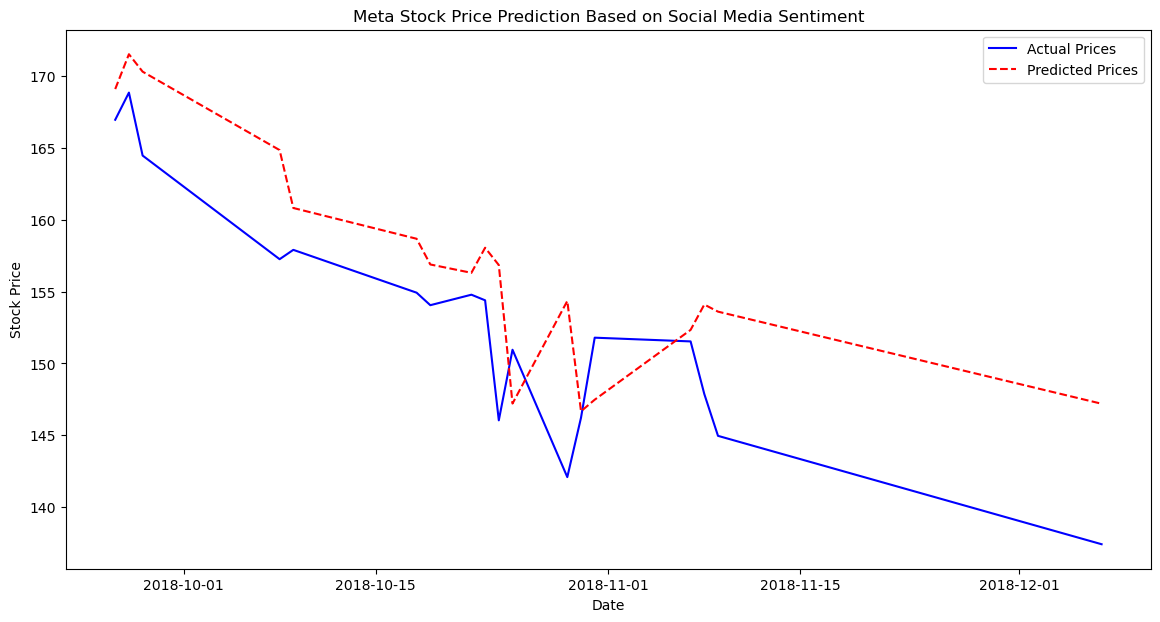

In [46]:
# Step 1: Data Preprocessing
# Assume social_media_dataset and meta_stocks_dataset are already loaded

# Filter for Meta (formerly Facebook) stocks
meta_tweets = social_media_dataset[social_media_dataset['STOCK'] == 'Meta']

# Ensure dates are in datetime format
#meta_tweets['DATE'] = pd.to_datetime(meta_tweets['DATE'])
#meta_stocks_dataset['Date'] = pd.to_datetime(meta_stocks_dataset['Date'])

# Group tweets by date to calculate daily average sentiment
daily_sentiment = meta_tweets.groupby('DATE')['vander_score'].mean().reset_index()

# Merge sentiment data with stock price data
merged_data = pd.merge(daily_sentiment, meta_stocks_dataset, left_on='DATE', right_on='Date')

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Step 2: Feature Engineering
# Features: daily sentiment, previous day's closing price
merged_data['Prev_Close'] = merged_data['Close'].shift(1)
merged_data.dropna(inplace=True)  # Drop the first row with NaN value due to the shift

# Features and target variable
X = merged_data[['vander_score', 'Prev_Close']]
y = merged_data['Close']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Step 7: Plotting the Results
plt.figure(figsize=(14,7))
plt.plot(merged_data['DATE'][-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(merged_data['DATE'][-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', color='red')
plt.title('Meta Stock Price Prediction Based on Social Media Sentiment')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Apple Stock Price Prediction Based on Social Media Sentiment
The chart shows a comparison between the actual Apple stock prices and predicted stock prices based on social media sentiment. The x-axis represents the date, while the y-axis represents the stock price. The blue line represents the actual stock prices, and the red line represents the predicted stock prices. The chart shows that the predicted stock prices follow the general trend of the actual stock prices but are not always accurate. In some periods, the predicted prices are significantly higher or lower than the actual prices.

Mean Absolute Error: 1.4847054948268388
Root Mean Squared Error: 2.4147541248013664


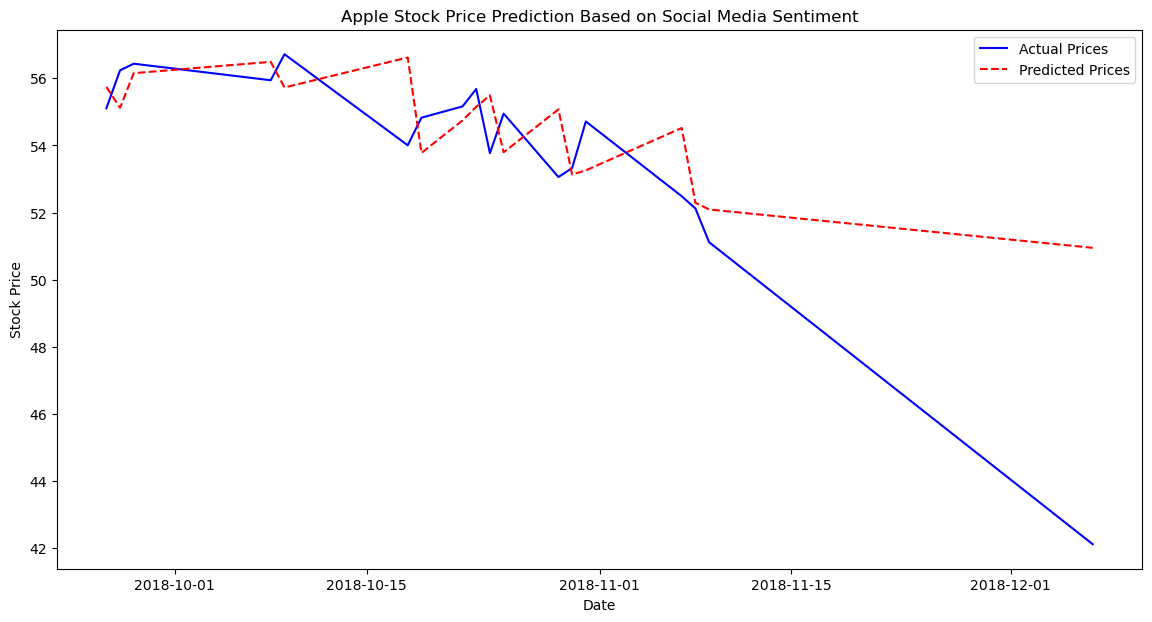

In [47]:
# Step 1: Data Preprocessing
# Assume social_media_dataset and meta_stocks_dataset are already loaded

# Filter for Meta (formerly Facebook) stocks
apple_tweets = social_media_dataset[social_media_dataset['STOCK'] == 'Apple']

# Ensure dates are in datetime format
#meta_tweets['DATE'] = pd.to_datetime(meta_tweets['DATE'])
#meta_stocks_dataset['Date'] = pd.to_datetime(meta_stocks_dataset['Date'])

# Group tweets by date to calculate daily average sentiment
daily_sentiment = apple_tweets.groupby('DATE')['vander_score'].mean().reset_index()

# Merge sentiment data with stock price data
merged_data = pd.merge(daily_sentiment, apple_stocks_dataset, left_on='DATE', right_on='Date')

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Step 2: Feature Engineering
# Features: daily sentiment, previous day's closing price
merged_data['Prev_Close'] = merged_data['Close'].shift(1)
merged_data.dropna(inplace=True)  # Drop the first row with NaN value due to the shift

# Features and target variable
X = merged_data[['vander_score', 'Prev_Close']]
y = merged_data['Close']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Step 7: Plotting the Results
plt.figure(figsize=(14,7))
plt.plot(merged_data['DATE'][-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(merged_data['DATE'][-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', color='red')
plt.title('Apple Stock Price Prediction Based on Social Media Sentiment')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Microsoft Stock Price Prediction Based on Social Media Sentiment
The chart shows a comparison between the actual Microsoft stock prices and predicted stock prices based on social media sentiment. The x-axis represents the date, while the y-axis represents the stock price. The blue line represents the actual stock prices, and the red line represents the predicted stock prices. The chart shows that the predicted stock prices follow the general trend of the actual stock prices but are not always accurate. In some periods, the predicted prices are significantly higher or lower than the actual prices. The Root Mean Squared Error (RMSE) of 3.193349565132617 indicates that the model's predictions are not very accurate, as the average error between the predicted and actual prices is relatively high.

Mean Absolute Error: 2.481709908238577
Root Mean Squared Error: 3.193349565132617


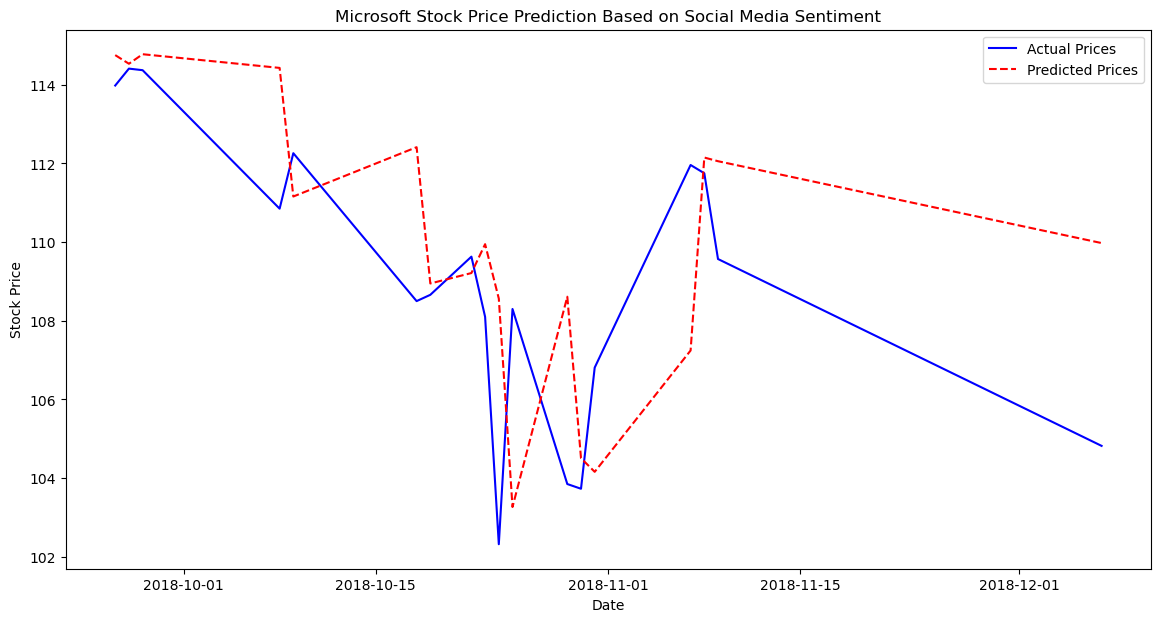

In [48]:
# Step 1: Data Preprocessing
# Assume social_media_dataset and meta_stocks_dataset are already loaded

# Filter for Meta (formerly Facebook) stocks
msft_tweets = social_media_dataset[social_media_dataset['STOCK'] == 'Microsoft']

# Group tweets by date to calculate daily average sentiment
daily_sentiment = msft_tweets.groupby('DATE')['vander_score'].mean().reset_index()

# Merge sentiment data with stock price data
merged_data = pd.merge(daily_sentiment, msft_stocks_dataset, left_on='DATE', right_on='Date')

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Step 2: Feature Engineering
# Features: daily sentiment, previous day's closing price
merged_data['Prev_Close'] = merged_data['Close'].shift(1)
merged_data.dropna(inplace=True)  # Drop the first row with NaN value due to the shift

# Features and target variable
X = merged_data[['vander_score', 'Prev_Close']]
y = merged_data['Close']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Step 7: Plotting the Results
plt.figure(figsize=(14,7))
plt.plot(merged_data['DATE'][-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(merged_data['DATE'][-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', color='red')
plt.title('Microsoft Stock Price Prediction Based on Social Media Sentiment')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

<h2 style="text-align: center; color: #69A3FF">Conclusion</h2>
The analysis presented in this study demonstrates the significant influence of social media on stock market movements. The emergence of social media platforms has democratized access to financial information, allowing individuals to participate in market discussions and potentially impact stock prices.

1. Key findings from the analysis include:

- Social media sentiment can predict stock price movements: The correlation between social media sentiment and stock prices, as observed in the case of Microsoft and Meta, suggests that public opinion expressed on these platforms can be a leading indicator of market trends.
- The impact of social media can vary across different stocks: While the analysis focused on Microsoft and Meta, the influence of social media on stock prices may vary depending on factors such as company size, industry sector, and investor interest.
- The effectiveness of social media sentiment analysis depends on data quality and model accuracy: The accuracy of stock price predictions based on social media sentiment relies on the quality of the data used and the robustness of the machine learning models employed.

In conclusion, social media has become an integral part of the modern financial landscape. Understanding its impact on stock markets is crucial for investors, traders, and policymakers alike. As social media platforms continue to evolve and new technologies emerge, it is essential to stay abreast of these developments and explore innovative methods for analyzing and leveraging social media data to make informed investment decisions.

# References
1. Kaggle - datasets
2. https://medium.com/@rohanshah0502/the-influence-of-social-media-on-stock-market-trends-feed4365f64e information
3. https://github.com/cjhutto/vaderSentiment